In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style="whitegrid")
%matplotlib inline

data = pd.read_csv('CSV_files/wine_quality.csv')

print("Dataset Shape:", data.shape)

Dataset Shape: (1143, 13)


In [2]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


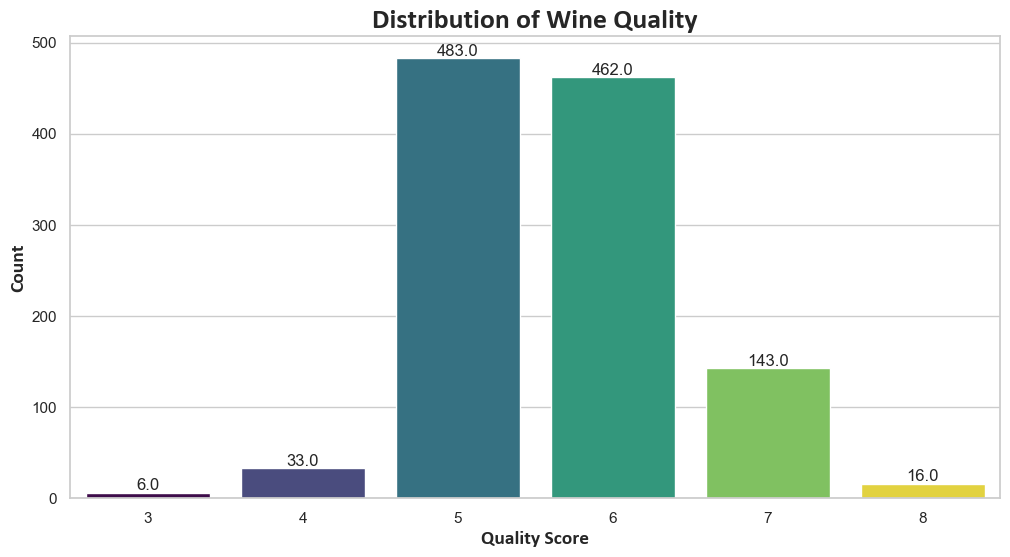

In [3]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='quality', data=data, hue='quality', palette='viridis', legend=False)
plt.title('Distribution of Wine Quality', fontdict={'fontname': 'Calibri', 'size': 20, 'weight': 'bold'})
plt.xlabel('Quality Score', fontdict={'fontname': 'Calibri', 'size': 14, 'weight': 'bold'})
plt.ylabel('Count', fontdict={'fontname': 'Calibri', 'size': 14, 'weight': 'bold'})
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0,5), textcoords='offset points')
plt.savefig('quality_count_graph.png', dpi=300, bbox_inches='tight')
plt.show();

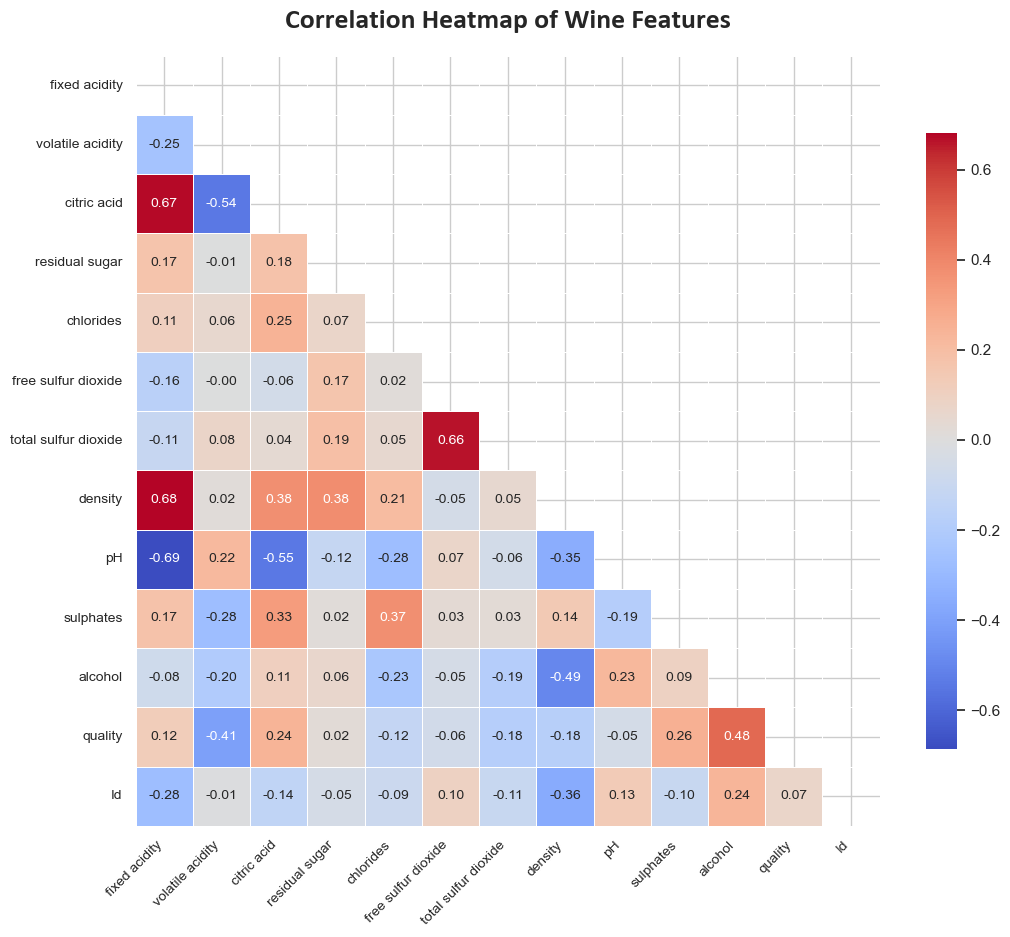

In [4]:
plt.figure(figsize=(12, 10))
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", 
           annot_kws={"size": 10}, cbar_kws={"shrink": 0.8}, 
           linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap of Wine Features', 
          fontdict={'fontname': 'Calibri', 'size': 20, 'weight': 'bold'}, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('correlation_heatmap_wine_features.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show();

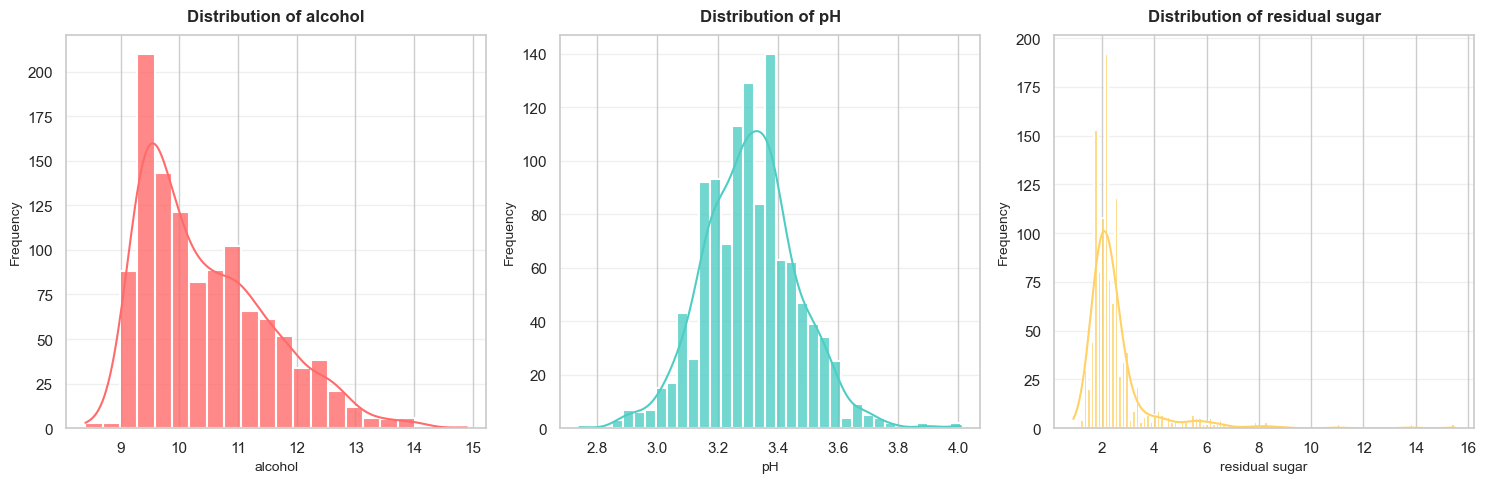

In [5]:
features = ['alcohol', 'pH', 'residual sugar']
colors = ['#FF6B6B', '#4ECDC4', '#FFD166']  # Vibrant color palette

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[feature], kde=True, color=colors[i], 
                edgecolor='white', linewidth=1.5, alpha=0.8)
    plt.title(f'Distribution of {feature}', fontweight='bold', pad=10)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(axis='y', alpha=0.3)
    
plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show();

In [7]:
data['good_wine'] = np.where(data['quality'] >= 7, 1, 0)
print(data['good_wine'].value_counts())

good_wine
0    984
1    159
Name: count, dtype: int64


In [8]:
X = data.drop('good_wine', axis=1)
y = data['good_wine']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      1.00      1.00        28

    accuracy                           1.00       229
   macro avg       1.00      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229



<Figure size 1500x800 with 0 Axes>

<Axes: >

Text(0.5, 55.249999999999986, 'Predicted')

Text(154.75, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

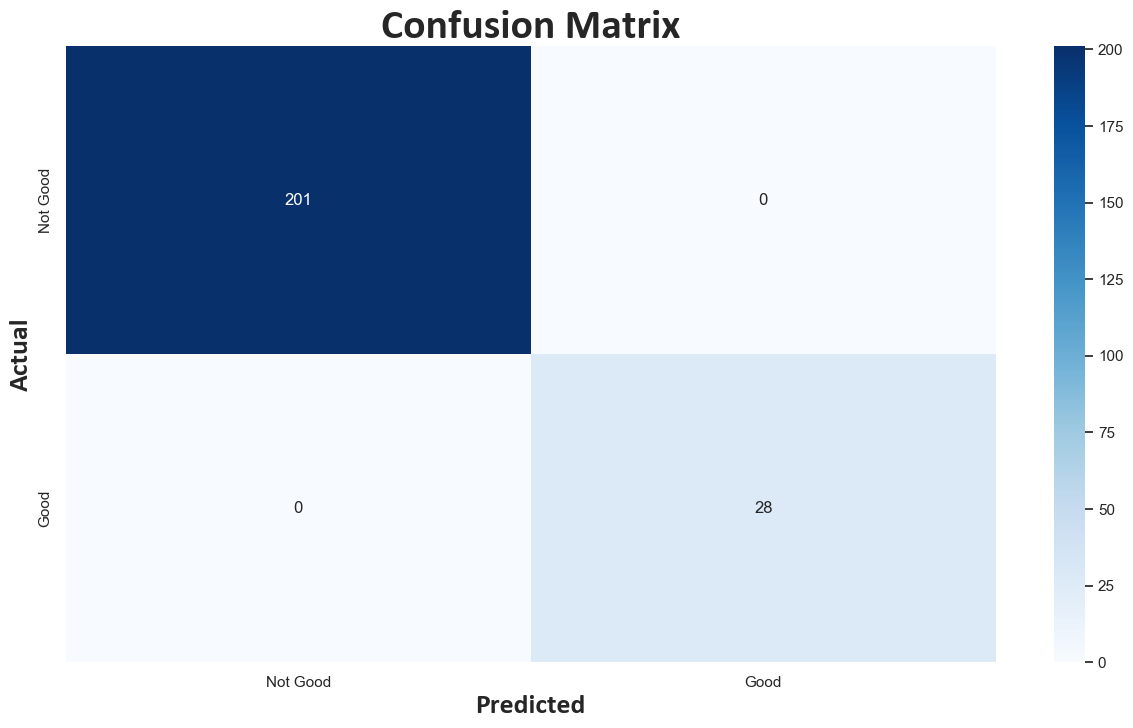

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Good', 'Good'], yticklabels=['Not Good', 'Good'])
plt.xlabel('Predicted', fontdict={'fontname': 'Calibri' , 'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Actual', fontdict={'fontname': 'Calibri' , 'fontsize':20, 'fontweight':'bold'})
plt.title('Confusion Matrix', fontdict={'fontname': 'Calibri' , 'fontsize':30, 'fontweight':'bold'})
# plt.savefig('confusion martix.png', dpi=300)
plt.show()

In [17]:
export_graphviz(tree, out_file='decision_tree_for wine_quality_dataset.dot',
                feature_names=X.columns,
                class_names=['Not Good', 'Good'],
                label='all',
                rounded=True, filled=True)
print("Decision Tree exported to 'decision_tree_for wine_quality_dataset.dot'.")

Decision Tree exported to 'decision_tree_for wine_quality_dataset.dot'.


In [11]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,good_wine
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,0,0
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,1,0
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,2,0
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6,3,0
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,4,0
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5,5,0
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5,6,0
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7,7,1
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7,8,1
9,6.7,0.580,0.08,1.80,0.097,15.0,65.0,0.99590,3.28,0.54,9.200000,5,10,0


In [12]:
cleaned_file = 'wine_quality_cleaned.csv'
data.to_csv(cleaned_file, index=False)
print(f"\nCleaned dataset saved as '{cleaned_file}'")


Cleaned dataset saved as 'wine_quality_cleaned.csv'
